In [441]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [442]:
image = cv2.imread('/home/amin/MACATHON_WS/src/Machathon-Autonomous-Vehicle/car_demo/scripts/modules/test3.png')
image_gray_ref = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image_gray = image_gray_ref + 100 - image_gray_ref.mean()

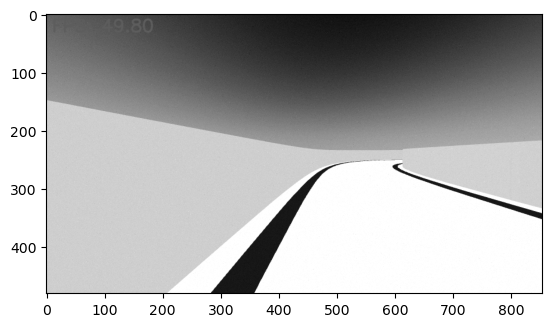

In [443]:
plt.imshow(image_gray_ref, cmap='gray')

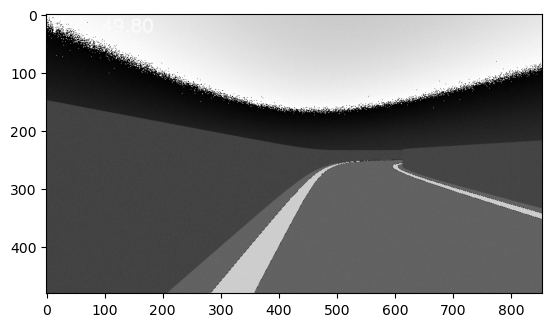

In [444]:
plt.imshow(image_gray, cmap='gray')

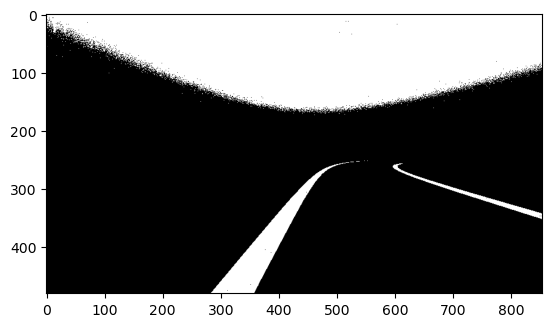

In [445]:
ret, image_gray_thresh = cv2.threshold(image_gray, 0, 255, cv2.THRESH_BINARY)
plt.imshow(image_gray_thresh, cmap='gray')

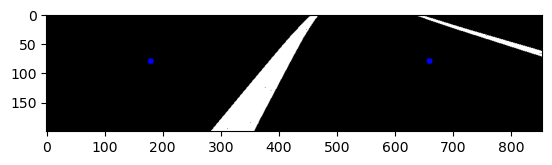

In [446]:
#Crop lower third of the image
height, width = image_gray_thresh.shape
dst = image_gray_thresh[int(7*height/12):height, 0:width]
prevpt1 = [180, 80]
prevpt2 = [660, 80]
dst_ann = cv2.cvtColor(dst.astype(np.uint8), cv2.COLOR_GRAY2BGR)
cv2.circle(dst_ann, (prevpt2[0], prevpt2[1]), 5, (0,0, 255), -1)
cv2.circle(dst_ann, (prevpt1[0], prevpt1[1]), 5, (0, 0, 255), -1)
plt.imshow(dst_ann)

In [447]:

num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(dst.astype(np.uint8), connectivity=8, ltype=cv2.CV_32S)



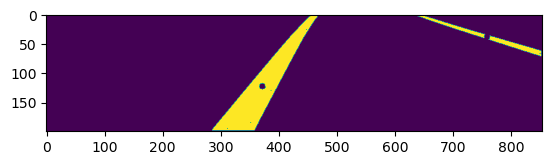

In [448]:
# Visualize the connected components

# Create a black image to draw the components
dst_ann = np.zeros_like(dst, np.uint8)

# Draw the components
for i in range(1, num_labels):
    # Draw the components
    dst_ann[labels == i] = 255

    # Draw the centroid
    cv2.circle(dst_ann, (int(centroids[i, 0]), int(centroids[i, 1])), 5, (0, 0, 255), -1)

    # Draw the bounding box
    x, y, w, h, area = stats[i]
    cv2.rectangle(dst_ann, (x, y), (x + w, y + h), (0, 255, 0), 2)

plt.imshow(dst_ann)

[192.90177542079778, 99.41133333333335]
[[372.9017754207978, 123.30251325801245], [759.4113333333333, 38.7]]
[[372.9017754207978, 123.30251325801245], [759.4113333333333, 38.7]]


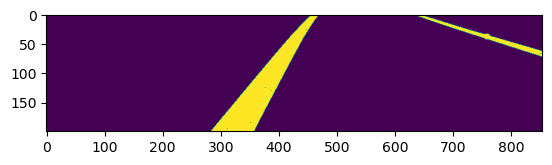

In [449]:
ptdistance = np.zeros(3)

mindistance1 = []
mindistance2 = []
threshdistance = [0,0]
minlb = [0,0]
cpt = [0,0]

if num_labels > 1:
    for i in range(1, num_labels):
        ptdistance[0] = abs(centroids[i][0] - prevpt1[0])
        ptdistance[1] = abs(centroids[i][0] - prevpt2[0])
        mindistance1.append(ptdistance[0])
        mindistance2.append(ptdistance[1])  

    threshdistance[0] = min(mindistance1)
    threshdistance[1] = min(mindistance2)
    print(threshdistance)
    
    minlb[0] = mindistance1.index(threshdistance[0])
    minlb[1] = mindistance2.index(threshdistance[1])

    cpt[0] = [centroids[minlb[0]+1][0], centroids[minlb[0]+1][1]]
    cpt[1] = [centroids[minlb[1]+1][0], centroids[minlb[1]+1][1]]

    # if (threshdistance[0]>100):
    #     cpt[0] = prevpt1
    # if (threshdistance[1]>100):
    #     cpt[1] = prevpt2

    mindistance1.clear()
    mindistance2.clear()

    print (cpt)
    #visualize the result
    dst_ann = dst
    dst_ann = cv2.circle(dst_ann, (int(cpt[0][0]), int(cpt[0][1])), 5, (255,255, 255), -1)
    dst_ann = cv2.circle(dst_ann, (int(cpt[1][0]), int(cpt[1][1])), 5, (255,255, 255), -1)
    plt.imshow(dst_ann)

else:
    cpt[0] = prevpt1
    cpt[1] = prevpt2

print(cpt)

In [450]:
prevpt1 = cpt[0]
prevpt2 = cpt[1]

fpt = [(cpt[0][0] + cpt[1][0])/2, (cpt[0][1] + cpt[1][1])/2 + int(7*height/12)]
cv2.cvtColor(dst.astype(np.uint8), cv2.COLOR_GRAY2BGR)

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [451]:
cv2.circle(image, (int(fpt[0]), int(fpt[1])), 2, (0, 0, 255), 2)
cv2.circle(dst,(int(cpt[0][0]), int(cpt[0][1])),2,(255,0,0),2)
cv2.circle(dst,(int(cpt[1][0]), int(cpt[1][1])),2,(255,0,0),2)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [452]:
error = height/2 - fpt[1]
error = (error*90.0/400)/15
print(error)

-121.0012566290062


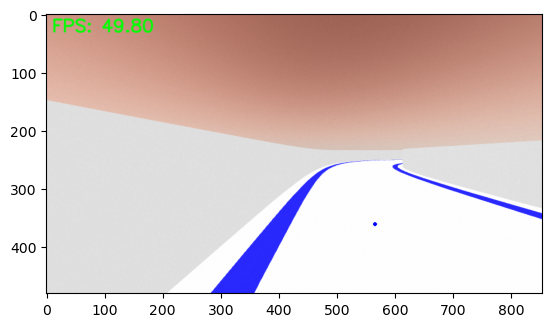

In [453]:
plt.imshow(image)

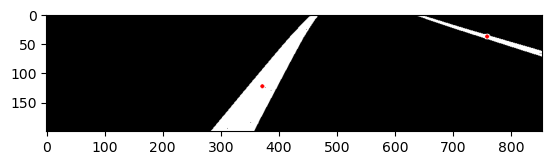

In [454]:
result = cv2.cvtColor(dst.astype(np.uint8), cv2.COLOR_GRAY2BGR)
cv2.circle(result, (int(fpt[0]), int(fpt[1])), 2, (0, 0, 255), 2)
cv2.circle(result,(int(cpt[0][0]), int(cpt[0][1])),2,(255,0,0),2)
cv2.circle(result,(int(cpt[1][0]), int(cpt[1][1])),2,(255,0,0),2)
plt.imshow(result)